## Visualization of the brain graph with D3.js

Let us load the brain adjacency matrix $A$. We first load the matlab mat file.

In [1]:
import networkx as nx
import scipy as sp
import numpy as np
import matplotlib.pyplot as plt
import scipy.io as spio
#D = sp.io.loadmat('/Users/benjamin/Documents/MATLAB/Brain/PH0092_test_timeseries.mat')
D = sp.io.loadmat('/Users/benjamin/Documents/PYTHON/PH0148_allscales_allnodes_with_labels.mat')

Now the mat file is stored in the dictionary $D$. Let us see what is inside $D$.

In [2]:
D.keys()

['SCw4',
 'labels',
 '__header__',
 '__globals__',
 'SCb1',
 'SCb2',
 'SCb3',
 'SCb4',
 'SCb5',
 'SCw5',
 '__version__',
 'SCw3',
 'SCw2',
 'SCw1']

The adjacency matrices of 5 different graphs, corresponding to different numbers of nodes are stored in $SC$. We extract the first (SCw1) of them.

In [3]:
#Brain1=100*np.log(1+D['SCw1'])
Brain1=D['SCw1']
Brainalllabels=D['labels']
Brain1labels=Brainalllabels[0][0]

In [4]:
Brain1labels.squeeze()

array([array([u'rh_lateralorbitofrontal'], 
      dtype='<U23'),
       array([u'rh_parsorbitalis'], 
      dtype='<U16'),
       array([u'rh_frontalpole'], 
      dtype='<U14'),
       array([u'rh_medialorbitofrontal'], 
      dtype='<U22'),
       array([u'rh_parstriangularis'], 
      dtype='<U19'),
       array([u'rh_parsopercularis'], 
      dtype='<U18'),
       array([u'rh_rostralmiddlefrontal'], 
      dtype='<U23'),
       array([u'rh_superiorfrontal'], 
      dtype='<U18'),
       array([u'rh_caudalmiddlefrontal'], 
      dtype='<U22'),
       array([u'rh_precentral'], 
      dtype='<U13'),
       array([u'rh_paracentral'], 
      dtype='<U14'),
       array([u'rh_rostralanteriorcingulate'], 
      dtype='<U27'),
       array([u'rh_caudalanteriorcingulate'], 
      dtype='<U26'),
       array([u'rh_posteriorcingulate'], 
      dtype='<U21'),
       array([u'rh_isthmuscingulate'], 
      dtype='<U19'),
       array([u'rh_postcentral'], 
      dtype='<U14'),
       array([u'rh_

In [5]:
np.histogram(Brain1)

(array([6627,  134,   58,   34,   18,    8,    2,    4,    0,    4]),
 array([ 0.        ,  0.00795999,  0.01591998,  0.02387996,  0.03183995,
         0.03979994,  0.04775993,  0.05571992,  0.0636799 ,  0.07163989,
         0.07959988]))

In [6]:
np.max(Brain1)

0.079599879726516554

We now use specific tools for graphs with networkx

In [7]:
G1=nx.from_numpy_matrix(Brain1)

/Users/benjamin/anaconda/lib/python2.7/site-packages/matplotlib/collections.py:650: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors_original != str('face'):
/Users/benjamin/anaconda/lib/python2.7/site-packages/matplotlib/collections.py:590: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors == str('face'):


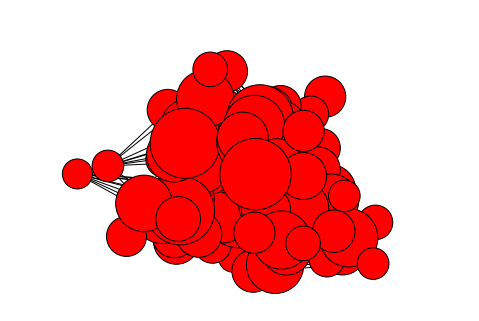

In [8]:
%matplotlib inline
plt.figure(1)
dg = nx.degree(G1)
nx.draw(G1, nodelist=dg.keys(), node_size=[v * 100 for v in dg.values()])
plt.show()

Rearanging the names to be recorded inside the graph and sorting left/right hemisphere regions:

In [9]:
Brain1labs={}
Labelsshort={}
group={}
for i in range(len(Brain1)):
    Brain1labs[i]=Brain1labels[0][i][0]
    if Brain1labs[i][0:2]=='lh':
        group[i]=1
        Labelsshort[i]=Brain1labs[i][3:]
    elif Brain1labs[i][0:2]=='rh':
        group[i]=2
        Labelsshort[i]=Brain1labs[i][3:]
    else:
        group[i]=0
        Labelsshort[i]=Brain1labs[i]
        

Adding some properties to the nodes

In [10]:
deg = nx.degree(G1)
nx.set_node_attributes(G1,'degree',deg)
nx.set_node_attributes(G1,'name',Labelsshort)
nx.set_node_attributes(G1,'group',group)
bb=nx.edge_betweenness_centrality(G1, normalized=False)
nx.set_edge_attributes(G1,'bb',bb)

Adding the attribute fixed (no force applied to these nodes if fixed=True)

In [59]:
fixed = {}
charge = {}
x = {}
y = {}
for i in range(len(Brain1)):
    x[i]= np.random.rand()*1000
    y[i]= np.random.rand()*1000
    fixed[i] = False
    charge[i] = -1
    if Labelsshort[i]=='lateraloccipital':
        fixed[i]=True
    elif Labelsshort[i]=='brainstem':
        fixed[i]=True
        x[i]=300
        y[i]=500

In [66]:
groupfixed=13
ii=22 #lateraloccipital
fixed[ii]=True
x[ii]=100
y[ii]=300
charge[ii]=0
group[ii]=groupfixed
ii=63
fixed[ii]=True
x[ii]=100
y[ii]=700
group[ii]=groupfixed
ii=0 #lateralorbitofrontal
fixed[ii]=True
x[ii]=800
y[ii]=300
group[ii]=groupfixed
ii=41
fixed[ii]=True
x[ii]=800
y[ii]=700
group[ii]=groupfixed
ii=9#precentral
fixed[ii]=True
x[ii]=550
y[ii]=200
group[ii]=groupfixed
ii=50
fixed[ii]=True
x[ii]=550
y[ii]=800
group[ii]=groupfixed
ii=15 #postcentral
fixed[ii]=True
x[ii]=450
y[ii]=200
group[ii]=groupfixed
ii= 56
fixed[ii]=True
x[ii]=450
y[ii]=800
group[ii]=groupfixed
for ii in range(33,41): # subcortical region
    group[ii]=4
    fixed[ii]=True
    x[ii]=500+(np.random.rand()-0.5)*50
    y[ii]=450+(np.random.rand()-0.5)*50
for ii in range(74,82):
    group[ii]=5
    fixed[ii]=True
    x[ii]=500+(np.random.rand()-0.5)*50
    y[ii]=550+(np.random.rand()-0.5)*50
    

In [67]:
weights = nx.get_edge_attributes(G1,'weight')
for i in nx.edges_iter(G1,nbunch=[22]): #22,63,82
    weights[i]=1000*np.max(Brain1)
nx.set_edge_attributes(G1,'weight2',weights)

distance=weights.copy()
for ii in distance.keys():
    distance[ii]=np.sqrt(-np.log(weights[ii]/(np.max(weights.values())+0.001))*50)
nx.set_edge_attributes(G1,'distance',distance)


In [68]:
nx.set_node_attributes(G1,'fixed',fixed)
nx.set_node_attributes(G1,'x',x)
nx.set_node_attributes(G1,'y',y)
nx.set_node_attributes(G1,'group',group)
nx.set_node_attributes(G1,'charge',charge)

### We now plot the brain graphs using D3 and javascript. 

Let us first import the json format for graphs

In [69]:
import json
from networkx.readwrite import json_graph

Now we import a simple method to create a web server.

In [70]:
import sys
sys.path.append('/Users/benjamin/Documents/PYTHON/')
import http_server


In [71]:
# write json formatted data
d1 = json_graph.node_link_data(G1) # node-link format to serialize
# write json 
json.dump(d1, open('force2016.json','w'))
#json.dump(d2, open('brainviz/force.json','w'))
print('Wrote node-link JSON data')

Wrote node-link JSON data


In [72]:
# open URL in running web browser
http_server.load_url('force2016.html')
print('Or copy all files in brainviz/ to webserver and load brainviz/brainviz.html')

Press <RETURN> to stop server

To restart server run: 
python -m SimpleHTTPServer 8000
Or copy all files in brainviz/ to webserver and load brainviz/brainviz.html


127.0.0.1 - - [08/Jan/2016 12:53:45] "GET /force2016_2.js HTTP/1.1" 200 -
127.0.0.1 - - [08/Jan/2016 12:53:45] "GET /force2016.json HTTP/1.1" 200 -
127.0.0.1 - - [08/Jan/2016 12:53:56] "GET /force2016.html HTTP/1.1" 200 -
127.0.0.1 - - [08/Jan/2016 12:53:56] "GET /d3-master/d3.min.js HTTP/1.1" 200 -
127.0.0.1 - - [08/Jan/2016 12:53:56] "GET /jquery-ui.min.js HTTP/1.1" 200 -
127.0.0.1 - - [08/Jan/2016 12:53:56] "GET /jquery-ui.css HTTP/1.1" 200 -
127.0.0.1 - - [08/Jan/2016 12:53:56] "GET /force.css HTTP/1.1" 200 -
127.0.0.1 - - [08/Jan/2016 12:53:56] "GET /force2016_2.js HTTP/1.1" 200 -
127.0.0.1 - - [08/Jan/2016 12:53:56] "GET /DesikanKilliany.jpg HTTP/1.1" 200 -
127.0.0.1 - - [08/Jan/2016 12:53:56] "GET /force2016.json HTTP/1.1" 200 -
127.0.0.1 - - [08/Jan/2016 12:56:30] "GET /force2016.html HTTP/1.1" 200 -
127.0.0.1 - - [08/Jan/2016 12:56:30] "GET /d3-master/d3.min.js HTTP/1.1" 200 -
127.0.0.1 - - [08/Jan/2016 12:56:30] "GET /jquery-ui.min.js HTTP/1.1" 200 -
127.0.0.1 - - [08/Jan/201